Code for dataloaders

In [1]:
!wget -O carpet.tar.xz "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937484-1629951672/carpet.tar.xz"

!mkdir -p mvtec/
!tar -xf carpet.tar.xz -C mvtec/

--2025-07-10 10:25:14--  https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937484-1629951672/carpet.tar.xz
Resolving www.mydrive.ch (www.mydrive.ch)... 91.214.169.64
Connecting to www.mydrive.ch (www.mydrive.ch)|91.214.169.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 740285760 (706M) [application/x-xz]
Saving to: ‘carpet.tar.xz’

carpet.tar.xz       100%[===================>] 705.99M  19.1MB/s    in 38s     

2025-07-10 10:25:53 (18.5 MB/s) - ‘carpet.tar.xz’ saved [740285760/740285760]



In [2]:
from torchvision import transforms
from torchvision.datasets import ImageFolder


transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

train_images_path = "mvtec/carpet/train" # applies automatically to sub directories
good_dataset = ImageFolder(train_images_path, transform=transform)

In [3]:
print(len(good_dataset))
print(good_dataset.class_to_idx) # for each subfolder, takes care of assigning index, if there were more classes, they also would be taken care of

280
{'good': 0}


In [4]:
first_sample = good_dataset[0]
eg1_img = first_sample[0]
eg1_label = first_sample[1]

print(type(first_sample)) # would be train/good/000.png
print(type(eg1_img))
print(type(eg1_label))

<class 'tuple'>
<class 'torch.Tensor'>
<class 'int'>


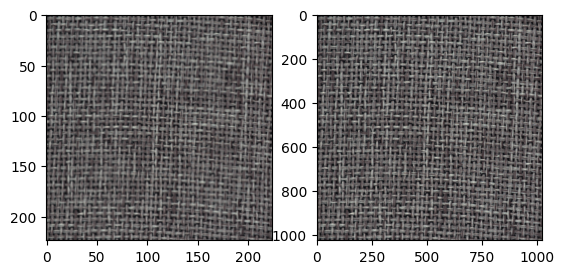

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

plt.subplot(1,2,1)
plt.imshow(eg1_img.permute(1,2,0))
plt.subplot(1,2,2)
plt.imshow(Image.open("mvtec/carpet/train/good/000.png"))
plt.show()

In [6]:
import torch
train_dataset, test_dataset = torch.utils.data.random_split(good_dataset, [0.8, 0.2]) # if you have multiple classes, remember that this does not stratify

print("Total number of samples in the original dataset:", len(good_dataset))
print("Number of samples in the training subset:", len(train_dataset))
print("Number of samples in the testing subset:", len(test_dataset))

Total number of samples in the original dataset: 280
Number of samples in the training subset: 224
Number of samples in the testing subset: 56


In [7]:
!nvidia-smi

Thu Jul 10 10:26:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   59C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [15]:
print(224/16, 56/16)

14.0 3.5


In [9]:
from torch.utils.data import DataLoader

BATCH_SIZE = 16

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [16]:
print(len(train_loader)) # 14 batches
print(len(test_loader)) # 4 batches

14
4


In [18]:
for i, (images, labels) in enumerate(test_loader):
    print(f"Batch {i}:")
    print(" - images.shape:", images.shape)
    print(" - labels.shape:", labels.shape)
# they all add up to 56

Batch 0:
 - images.shape: torch.Size([16, 3, 224, 224])
 - labels.shape: torch.Size([16])
Batch 1:
 - images.shape: torch.Size([16, 3, 224, 224])
 - labels.shape: torch.Size([16])
Batch 2:
 - images.shape: torch.Size([16, 3, 224, 224])
 - labels.shape: torch.Size([16])
Batch 3:
 - images.shape: torch.Size([8, 3, 224, 224])
 - labels.shape: torch.Size([8])


In [23]:
image_batch, label_batch = next(iter(train_loader)) # get batch 0

print(f'Shape of input images: {image_batch.shape}')
print(f'Shape of labels: {label_batch.shape}')

print(f"Image batch dtype: {image_batch.dtype}")
print(f"Label batch dtype: {label_batch.dtype}")
print(image_batch.numel())
print(image_batch.element_size()) # 4 since float32
print(label_batch.element_size()) # 8 since int64

memory_usage = image_batch.numel() * image_batch.element_size()

print(f"Memory usage of the tensor: {memory_usage//1024} KB")


Shape of input images: torch.Size([16, 3, 224, 224])
Shape of labels: torch.Size([16])
Image batch dtype: torch.float32
Label batch dtype: torch.int64
2408448
4
8
Memory usage of the tensor: 9408 KB


In [20]:
print(type(train_loader.dataset))

<class 'torch.utils.data.dataset.Subset'>


In [25]:
print(train_loader.batch_size)         # Shows batch size
print(train_loader.num_workers)        # Number of parallel workers
print(train_loader.pin_memory)         # True if memory pinning enabled


16
0
False


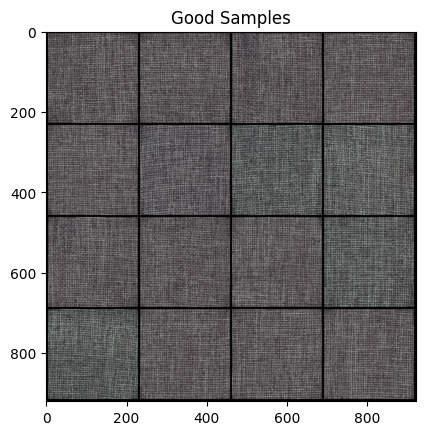

In [33]:
import torchvision

grid = torchvision.utils.make_grid(image_batch, padding=5, nrow=4)
plt.imshow(grid.permute(1, 2, 0))  # Permute dimensions to (height, width, channels) for visualization
plt.title('Good Samples')
plt.show()